## Business problem statement

The most important function of a bank is to accept deposits and provide loans using it. Bank attracts Credit risk by lending loans to its customers where Credit Risk is the probability of the counterparty defaulting on its loan. So it a pivotal function of a bank to seggregate the customers into good and bad credit applicants. So here, with the past year data, we'll classify the credit applicants using the ML algorithms. 

## Data source

Kaggle : Link,
https://www.kaggle.com/datasets/laotse/credit-risk-dataset

## Data variables

Annual Income, Home ownership, Employment length (in years), Loan intent, Loan grade, Loan amount, Interest rate, Loan status(0 is no default 1 is default), Loan amount, Percent Income, History default and Credit Length History

## Model Evaluation on test data (Accuracy)

# Most important features
1. loan_percent_income : 0.211
2. person_income : 0.109
3. loan_int_rate : 0.093

# Code

Intializing the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn import tree
import matplotlib.pyplot as plt


C:\Users\rajja\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Intializing the dataset

In [2]:
df1=pd.read_csv("credit_risk_dataset.csv")

In [3]:
df=df1

In [4]:
df1.head(), df['loan_status'].value_counts()

(   person_age  person_income person_home_ownership  person_emp_length  \
 0          22          59000                  RENT              123.0   
 1          21           9600                   OWN                5.0   
 2          25           9600              MORTGAGE                1.0   
 3          23          65500                  RENT                4.0   
 4          24          54400                  RENT                8.0   
 
   loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status  \
 0    PERSONAL          D      35000          16.02            1   
 1   EDUCATION          B       1000          11.14            0   
 2     MEDICAL          C       5500          12.87            1   
 3     MEDICAL          C      35000          15.23            1   
 4     MEDICAL          C      35000          14.27            1   
 
    loan_percent_income cb_person_default_on_file  cb_person_cred_hist_length  
 0                 0.59                         Y               

In [5]:
df1.tail()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


In [6]:
df.describe()
df1.shape

(32581, 12)

In [7]:
df['loan_status'].value_counts(normalize=True)

0    0.781836
1    0.218164
Name: loan_status, dtype: float64

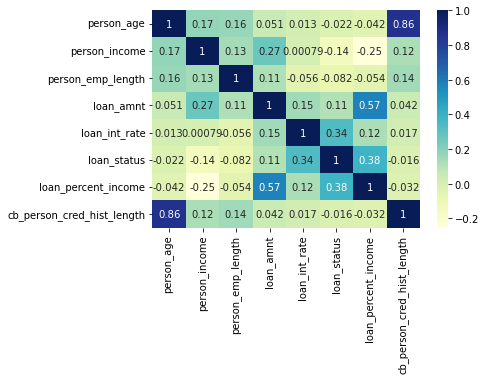

In [8]:
dataplot = sb.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

## Data Preprocessing

Creating dummy variables for the categorical data features

In [9]:
df1.info()
df1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [10]:
df1.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [11]:
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i] = pd.Categorical(df1[i]).codes

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  int8   
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  int8   
 5   loan_grade                  32581 non-null  int8   
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  int8   
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), int8(4)
memory usage: 2.1 MB


In [13]:
df1 = pd.get_dummies(df1 , columns = ['person_home_ownership' ,'loan_intent','loan_grade','cb_person_default_on_file'])

In [14]:
df1.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_0,person_home_ownership_1,...,loan_intent_5,loan_grade_0,loan_grade_1,loan_grade_2,loan_grade_3,loan_grade_4,loan_grade_5,loan_grade_6,cb_person_default_on_file_0,cb_person_default_on_file_1
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,0,0,0,1,0,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,...,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,...,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,0,0,0,1,0,0,0,0,0,1


Treatment of the null values

In [15]:
df1.isnull().sum()

person_age                        0
person_income                     0
person_emp_length               895
loan_amnt                         0
loan_int_rate                  3116
loan_status                       0
loan_percent_income               0
cb_person_cred_hist_length        0
person_home_ownership_0           0
person_home_ownership_1           0
person_home_ownership_2           0
person_home_ownership_3           0
loan_intent_0                     0
loan_intent_1                     0
loan_intent_2                     0
loan_intent_3                     0
loan_intent_4                     0
loan_intent_5                     0
loan_grade_0                      0
loan_grade_1                      0
loan_grade_2                      0
loan_grade_3                      0
loan_grade_4                      0
loan_grade_5                      0
loan_grade_6                      0
cb_person_default_on_file_0       0
cb_person_default_on_file_1       0
dtype: int64

In [16]:
df1=df1.dropna()

In [17]:
df1_target=df1.pop('loan_status')

In [18]:
df1.shape

(28638, 26)

Standarding the data 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(df1)

Splitting the data into train and test

In [20]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(df1,df1_target,test_size=0.3,random_state=142)

Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
y_train_pred=lr.predict(x_train)
y_test_pred=lr.predict(x_test)

In [23]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
confusion_matrix(y_train,y_train_pred)

array([[15477,   247],
       [ 3616,   706]], dtype=int64)

In [24]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89     15724
           1       0.74      0.16      0.27      4322

    accuracy                           0.81     20046
   macro avg       0.78      0.57      0.58     20046
weighted avg       0.80      0.81      0.76     20046



In [25]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      6711
           1       0.74      0.16      0.27      1881

    accuracy                           0.80      8592
   macro avg       0.78      0.57      0.58      8592
weighted avg       0.79      0.80      0.75      8592



Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dts=DecisionTreeClassifier(criterion='gini',
                                           max_depth = 12,
                                           min_samples_leaf=25,
                                           min_samples_split=75)
dts.fit(x_train,y_train)
y_train_pred=dts.predict(x_train)
y_test_pred=dts.predict(x_test)


In [27]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     15724
           1       0.95      0.70      0.80      4322

    accuracy                           0.93     20046
   macro avg       0.94      0.84      0.88     20046
weighted avg       0.93      0.93      0.92     20046



In [28]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6711
           1       0.95      0.70      0.81      1881

    accuracy                           0.93      8592
   macro avg       0.94      0.84      0.88      8592
weighted avg       0.93      0.93      0.92      8592



KNeighorsClassifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
knn=KNeighborsClassifier()

In [31]:
knn.fit(x_train,y_train)
y_train_pred=knn.predict(x_train)
y_test_pred=knn.predict(x_test)


In [32]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     15724
           1       0.78      0.59      0.67      4322

    accuracy                           0.88     20046
   macro avg       0.84      0.77      0.80     20046
weighted avg       0.87      0.88      0.87     20046



In [33]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      6711
           1       0.65      0.48      0.55      1881

    accuracy                           0.83      8592
   macro avg       0.76      0.70      0.72      8592
weighted avg       0.82      0.83      0.82      8592



Random Forest 

In [34]:
from sklearn.ensemble import RandomForestClassifier as RF


In [35]:
rf=RF(n_estimators=100,max_depth = 12,
                                           min_samples_leaf=25,
                                           min_samples_split=75)

In [36]:
rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=12, min_samples_leaf=25, min_samples_split=75)

In [37]:
y_train_pred=rf.predict(x_train)
y_test_pred=rf.predict(x_test)

In [38]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     15724
           1       0.97      0.69      0.81      4322

    accuracy                           0.93     20046
   macro avg       0.95      0.84      0.88     20046
weighted avg       0.93      0.93      0.92     20046



In [39]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95      6711
           1       0.97      0.68      0.80      1881

    accuracy                           0.93      8592
   macro avg       0.94      0.84      0.88      8592
weighted avg       0.93      0.93      0.92      8592



In [40]:
feature_importances = RF.feature_importances_

In [41]:
feature_importance_df = pd.DataFrame({'Feature': df1.columns, 'Importance': feature_importances})

In [42]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

TypeError: '<' not supported between instances of 'property' and 'property'

TypeError: unsupported operand type(s) for +: 'int' and 'property'

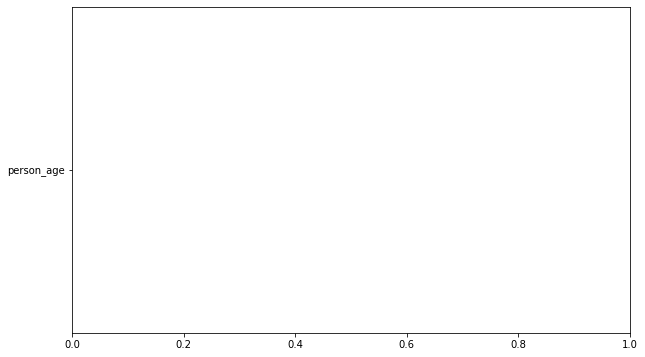

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(df1, df1_target)
feature_importance = model.feature_importances_

In [45]:
feature_importance

array([0.06126754, 0.10632564, 0.07516003, 0.08416708, 0.08831189,
       0.21771421, 0.05112593, 0.01884356, 0.00095526, 0.01392458,
       0.03985322, 0.02219461, 0.00990199, 0.0097834 , 0.01968612,
       0.00818411, 0.0088043 , 0.01190152, 0.0082581 , 0.02327183,
       0.07395446, 0.02137078, 0.00613016, 0.0038612 , 0.00842752,
       0.00662097])

In [46]:
df1.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'person_home_ownership_0', 'person_home_ownership_1',
       'person_home_ownership_2', 'person_home_ownership_3', 'loan_intent_0',
       'loan_intent_1', 'loan_intent_2', 'loan_intent_3', 'loan_intent_4',
       'loan_intent_5', 'loan_grade_0', 'loan_grade_1', 'loan_grade_2',
       'loan_grade_3', 'loan_grade_4', 'loan_grade_5', 'loan_grade_6',
       'cb_person_default_on_file_0', 'cb_person_default_on_file_1'],
      dtype='object')

In [47]:
import numpy as np
from sklearn.feature_selection import mutual_info_classif

In [48]:
mutual_info_scores = mutual_info_classif(df1, df1_target)

In [49]:
for feature, score in enumerate(mutual_info_scores):
    print(f"Feature {feature + 1}: Mutual Information = {score:.4f}")

Feature 1: Mutual Information = 0.0000
Feature 2: Mutual Information = 0.1112
Feature 3: Mutual Information = 0.0024
Feature 4: Mutual Information = 0.0126
Feature 5: Mutual Information = 0.0799
Feature 6: Mutual Information = 0.0838
Feature 7: Mutual Information = 0.0000
Feature 8: Mutual Information = 0.0149
Feature 9: Mutual Information = 0.0000
Feature 10: Mutual Information = 0.0047
Feature 11: Mutual Information = 0.0253
Feature 12: Mutual Information = 0.0017
Feature 13: Mutual Information = 0.0000
Feature 14: Mutual Information = 0.0005
Feature 15: Mutual Information = 0.0017
Feature 16: Mutual Information = 0.0000
Feature 17: Mutual Information = 0.0030
Feature 18: Mutual Information = 0.0270
Feature 19: Mutual Information = 0.0053
Feature 20: Mutual Information = 0.0048
Feature 21: Mutual Information = 0.0485
Feature 22: Mutual Information = 0.0093
Feature 23: Mutual Information = 0.0000
Feature 24: Mutual Information = 0.0028
Feature 25: Mutual Information = 0.0158
Feature 2

In [50]:
from sklearn.linear_model import LassoCV

In [51]:
lasso_cv = LassoCV(cv=8)

In [52]:
lasso_cv.fit(df1,df1_target)

LassoCV(cv=8)

In [53]:
selected_features = np.where(lasso_cv.coef_ != 0)[0]

In [54]:
print("Selected feature indices:", selected_features)

Selected feature indices: [1]


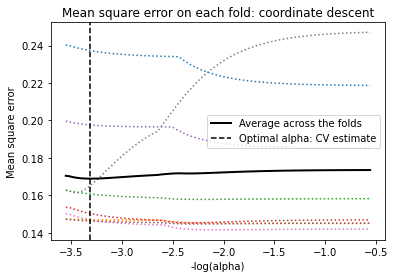

In [55]:
m_log_alphas = -np.log10(lasso_cv.alphas_)

plt.figure()
plt.plot(m_log_alphas, lasso_cv.mse_path_, ':')
plt.plot(m_log_alphas, lasso_cv.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(lasso_cv.alpha_), linestyle='--', color='k',
            label='Optimal alpha: CV estimate')
plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent')
plt.axis('tight')
plt.legend()
plt.show()

In [ ]:
from sklearn.svm import SVC

# Train an SVM classifier or regressor
svm_model = SVC(kernel='linear')  # For classification
# svm_model = SVR(kernel='linear')  # For regression
svm_model.fit(df1, df1_target)

# Get feature importances (coefficients) for linear SVM
feature_importances = np.abs(svm_model.coef_)